# Powered by the Earth's Breath
![](https://evcvaluation.com/wp-content/uploads/2019/05/requestvaluationbanner.jpg)
##### By Jeff Akins

#### Imports

In [17]:
import requests
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pyproj import Proj
import dateutil
from env import user_key

In [2]:
#response = requests.get()

In [3]:
f = h5pyd.File("/nrel/wtk-us.h5", 'r')

In [4]:
wind_df = pd.read_csv('wtk_site_metadata.csv')

In [5]:
wind_df.head()

,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
0,0,-117.147260,23.510410,Unknown,Unknown,1.0,offshore,16,6.07,0.169,0,0/0.nc
1,1,-93.946777,24.007446,Unknown,Unknown,1.0,offshore,16,7.43,0.302,0,0/1.nc
2,2,-97.482483,25.069138,Unknown,Unknown,1.0,offshore,16,8.19,0.375,0,0/2.nc
3,3,-97.463135,25.069443,Unknown,Unknown,1.0,offshore,16,8.19,0.375,0,0/3.nc
4,4,-97.443756,25.069763,Unknown,Unknown,1.0,offshore,16,8.19,0.376,0,0/4.nc


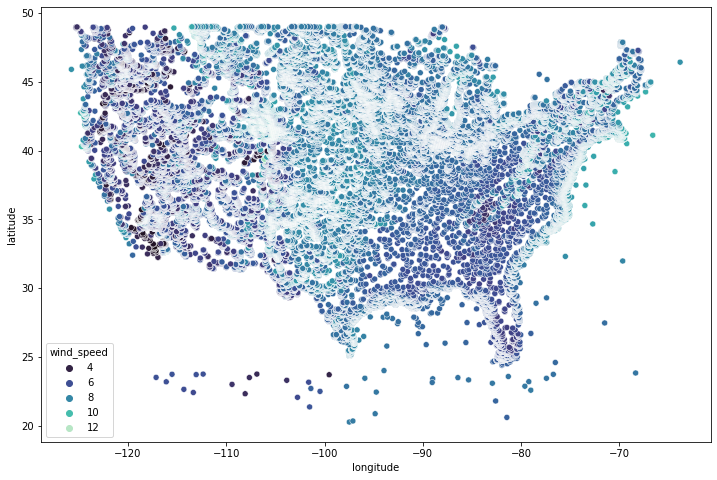

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='wind_speed', palette="mako", data=wind_df)
plt.show()

In [7]:
f = h5pyd.File("/nrel/wtk-us.h5", 'r')

In [8]:
f

<HDF5 file "wtk-us.h5" (mode r)>

In [9]:
list(f)

['inversemoninobukhovlength_2m',
 'status',
 'windspeed_10m',
 'temperature_80m',
 'temperature_160m',
 'temperature_200m',
 'pressure_200m',
 'DIF',
 'temperature_10m',
 'winddirection_120m',
 'windspeed_120m',
 'windspeed_140m',
 'temperature_60m',
 'relativehumidity_2m',
 'windspeed_200m',
 'temperature_140m',
 'precipitationrate_0m',
 'winddirection_160m',
 'pressure_0m',
 'GHI',
 'windspeed_80m',
 'winddirection_100m',
 'temperature_2m',
 'temperature_40m',
 'coordinates',
 'winddirection_60m',
 'windspeed_160m',
 'winddirection_40m',
 'winddirection_10m',
 'DNI',
 'winddirection_200m',
 'windspeed_60m',
 'datetime',
 'pressure_100m',
 'windspeed_40m',
 'temperature_120m',
 'windspeed_100m',
 'winddirection_140m',
 'temperature_100m',
 'winddirection_80m']

#### A bit of Information on Wind Turbines:
The widely used GE 1.5-megawatt wind turbine, for example, consists of 116-ft blades atop a 212-ft (~65 meters) tower for a total height of 328 feet. 

In [10]:
dset = f['windspeed_60m']
dset.shape

(61368, 1602, 2976)

In [14]:
dset

<HDF5 dataset "windspeed_60m": shape (61368, 1602, 2976), type "<f4">

### Time Slicing

In [18]:
dt = f["datetime"]
dt = pd.DataFrame({"datetime": dt[:]},index=range(0,dt.shape[0]))
dt['datetime'] = dt['datetime'].apply(dateutil.parser.parse)
dt.head()

,datetime
0,2007-01-01 00:00:00
1,2007-01-01 01:00:00
2,2007-01-01 02:00:00
3,2007-01-01 03:00:00
4,2007-01-01 04:00:00


In [19]:
dt.shape

(61368, 1)

In [20]:
dt.tail()

,datetime
61363,2013-12-31 19:00:00
61364,2013-12-31 20:00:00
61365,2013-12-31 21:00:00
61366,2013-12-31 22:00:00
61367,2013-12-31 23:00:00


In [21]:
twentyten = dt.loc[(dt.datetime >= '2010-01-01') & (dt.datetime < '2011-01-01')].index
twentyten

Int64Index([26304, 26305, 26306, 26307, 26308, 26309, 26310, 26311, 26312,
            26313,
            ...
            35054, 35055, 35056, 35057, 35058, 35059, 35060, 35061, 35062,
            35063],
           dtype='int64', length=8760)

### Map Data

In [23]:
# Single date
timestep = dt.loc[dt.datetime == '2012-04-01 12:00:00'].index[0]
timestep

46020

In [24]:
%time data = dset[timestep,::8,::8]   # extract every 8th record at a particular time

CPU times: user 5.51 ms, sys: 1.99 ms, total: 7.5 ms
Wall time: 2.15 s


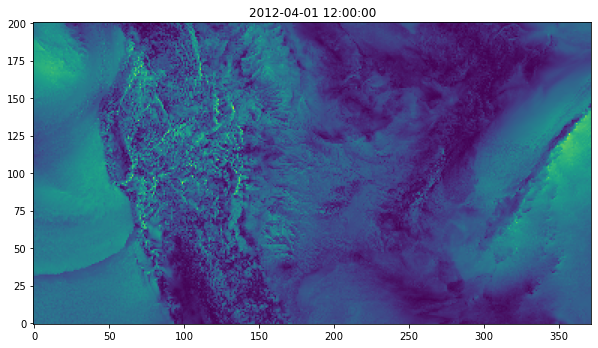

In [31]:
plt.figure(figsize=(10,6))
plt.title(str(dt.loc[timestep,"datetime"]))
plt.imshow(data, origin="lower")
plt.show()